In [1]:
# Standerd imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Geting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into feaures nad lables(usually `x` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numarical values(also called feature encoding)

In [1]:
what_we_are_covering = [


'0. An end-to-end Scikit-learn worklflow',
'1. Getting the data ready',
'2. Chose the right estimatoralgorithm for our problems',
'3. Fit the model/algorithm and use it to make prediction on our data',
'4. Evaluating a model',
'5. Improve a model',
'6. Save and load a traned model',
'7. Putting it all together!'
]

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# S1 split into data and conclusion
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [5]:
#s2 Split x,y even more into test & train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### 1.1 Make sure all is numerical

In [6]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [7]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [8]:
# split into x/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# split into traning and test
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [10]:
# Now Convert the data into numbers 
# Make - yes
# Colour - yes 
# Odomeater (KM) - No
# Doors - Yes (As number of dors are fix and can vary in catagaries like 4,5,3 it is considered to be catagorical)
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# List of categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Define the transformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Fit and transform the data
transformed_x = transformer.fit_transform(x)

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [13]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [14]:
# Secand way to convert data into numbers 
dummies = pd.get_dummies(car_sales[["text","common_name","Review"]],dtype=float)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Let's refill the model use to split the data into train and test
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train);

In [16]:
model.score(x_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values ?
1.Fill them with some value (also known as imputation).

2.Remove the samples with missing data altogether.

In [17]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [18]:
# isna() check the missing value in data & .sum() tell total values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
x_missing = car_sales_missing.drop("Price",axis=1)
y_missing = car_sales_missing["Price"]

In [20]:
# now convert data to nubers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x_missing)

transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [21]:
# sparce matrix is not considered so we have to convert it some how

### Fill missing data with pandas

In [22]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [23]:
# Fill the make column
car_sales_missing["Make"].fillna("missing",inplace = True)

# Fill the colore column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4,inplace=True)


C:\Users\avk24\AppData\Local\Temp\ipykernel_55976\1284531322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace = True)
C:\Users\avk24\AppData\Local\Temp\ipykernel_55976\1284531322.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [24]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [25]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [26]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [27]:
len(car_sales_missing)

950

In [28]:
x_missing = car_sales_missing.drop("Price",axis=1)
y_missing = car_sales_missing["Price"]

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2 fill missing value with scikit learn

In [30]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Drops the rows with missing Price Data
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [33]:
# Split into x & y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

## Imputation

In [34]:
# Filling missing values is also Known as imputation
# Filling missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Catagorical values with "missing" & numerrical value with mean

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create the imputer (Something that fill missing values)

# ColuColumnTransformer([(),(),()]) contains list in which touple is stored , Syantax of tupple ("name to recognise the function",opration_or_function,list on which opration will be performed)

imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                            ("door_imputer",door_imputer,door_features),
                            ("num_imputer",num_imputer,num_features)])
# Transform the data
filled_x = imputer.fit_transform(x)


filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [35]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [36]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)

transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [38]:
# Now we,ve got data in numbers and filled (no missing values)
# Let's fit model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.21990196728583944

In [39]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## Chosing the right estimator/algorithm for your problem
some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classfiction problem - predecting a category(heart disease or not) 
    *Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression program - predicting a number(selling price of a car)

if you're working an a machine learning problem to use Sklearn and not sure what model you should use,
refer to the sklearn machine learning map:https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regration problem
let's use california Housing Dataset

In [40]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
# import algorithim
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingClassifier
# setup rab=ndom seed
np.random.seed(42)

#create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house price in $100,000's

# Split into train & test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# model 1 try
#Instantiate and fit the model (on the set)
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440126

What if `Ridge` don't work or the score didn't fit our needs ?

Well, we could always try a diffrent model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predection than the just single model ) ?

Sklear's ensemble model can be found here: https://scikit-learn.org/stable/modules/ensemble.html

Random forest is the combination of dessition trees

In [44]:
# import the random forest regresser from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# Creat the data
x = housing_df.drop("target",axis = 1)
y = housing_df["target"]

# Split into train & test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.806652667101436

In [45]:
model.predict(x_test)

array([0.4939   , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67781  ])

## 2.2 Picking a machine learning model for clasification model


In [46]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
len(heart_disease)

303

Consulting the map and it say try `linearSVC`

In [48]:
# Import teh LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Splt the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
model = LinearSVC()

# Fit the model
model.fit(x_train,y_train)

#See the score of model
model.score(x_test,y_test)

0.8688524590163934

In [49]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [50]:
# secand model
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_test,x_train,y_test,y_train = train_test_split(x,y)

clf = RandomForestClassifier() 

clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8149779735682819

Tidbit:
        
        1.If you have structured data, used ensemble methods
        
        2.If you have unstructured data,use deep learning or transfer learning

In [51]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##  3.Fit the model/algorithm and use it to make prediction on our data

### 3.1 Fitting the model to the data

`x` = features, features variables, data
`y` = lables, target, target variables

In [52]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y)

clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8289473684210527

In [53]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make prediction using a machine learning model

2 ways to make predictions:

    1. `predict()`

    2. `Predict_proba()`

In [54]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) #this does't work...

C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
clf.predict(x_test) # predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [56]:
np.array(y_test) #truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [57]:
# Compare predition to truth lables to evaluae the model
y_preds = clf.predict(x_test)

float(np.mean(y_preds == y_test))

0.8289473684210527

In [58]:
clf.score(x_test,y_test)

0.8289473684210527

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8289473684210527

 Make prediction with `predict_proba()`

In [60]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5]) # if the rite side value is true then the data is 1 & if not then 0

array([[0.91, 0.09],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.85, 0.15],
       [0.25, 0.75]])

In [61]:
0.91+0.09,0.45+0.55

(1.0, 1.0)

In [62]:
# Let's predict() on the same data....
clf.predict(x_test[:5])

array([0, 1, 0, 0, 1], dtype=int64)

In [63]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`prdict` can also be used for regretiion model

In [64]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = housing_df.drop("target",axis=1)
y = housing_df["target"]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

y_preds = model.predict(x_test)

In [66]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [67]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [68]:
len(y_preds),len(y_test)

(4128, 4128)

In [69]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

float(mean_absolute_error(y_test,y_preds))

0.32656738464147306

In [70]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [71]:
what_we_are_covering

['0. An end-to-end Scikit-learn worklflow',
 '1. Getting the data ready',
 '2. Chose the right estimatoralgorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a traned model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

        1. Estimator's built- in `score()` method
        2. The `scoring` parameater
        3. Problem specifit metric functions

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating model with score method

In [72]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
# the highest value for the score() method is 1.0 the lowest 0.0
clf.score(x_train,y_train)

0.987603305785124

In [74]:
model.score(x_test,y_test)

0.8524590163934426

Let's use `score()`on our regrasion problem

In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


x= housing_df.drop("target",axis = 1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=80)

model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=80)

In [76]:
model.score(x_train,y_train)

0.9734199553195205

In [77]:
model.score(x_test,y_test)

0.8063285573441384

In [78]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 Evaluating a model using the scoring parameter

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


x= housing_df.drop("target",axis = 1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # Nomal train & split

model = RandomForestRegressor(n_estimators=80)

model.fit(x_train,y_train);


In [80]:
model.score(x_test,y_test)

0.8063285573441384

In [81]:
cross_val_score(model,x,y,cv=10) # cross validation here cv is each fold therefore it given us f diffrent score

array([0.26415529, 0.67979611, 0.72418791, 0.69295942, 0.77032204,
       0.69890736, 0.51913704, 0.60053778, 0.48535502, 0.7021533 ])

<img src = "cross_val.jpg"/>

In [82]:
np.random.seed(42)

# Single training and test split score
clf_single_score = model.score(x_test,y_test)

# take the mean of 5-fold cross validation score
clf_cross_val_score = float(np.mean(cross_val_score(model,x,y,cv=5)))

#Compare the two
clf_single_score,clf_cross_val_score

(0.8063285573441384, 0.6514581286929053)

In [83]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [84]:
# Scoring parameater set to None by default
cross_val_score(model,x,y,cv=5, scoring=None) # scoring parameater means we use default parameater that is .score() we cant't define our,s

array([0.52040415, 0.70286999, 0.73860993, 0.62499666, 0.68124829])

### 4.2.1 Clasification model evaluation metrics

1.Accuracy

2.Area undr RoC curve

3.Confusion matrix

4.Classlfication report

**Acuracy**

In [85]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

cross_val_score = cross_val_score(model,x,y,cv=5)

In [87]:
np.mean(cross_val_score)

0.8349180327868853

In [88]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 83.49%


**Area under the recevier Oprating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* Roc Curve

ROC curves are a comparision of a model's true positive rate (tpr) v/s a models false positive rate(fpr).

* True positive = model predicts 1 when is 1.
* False positive = model predicts 1 when truth is 0.
* True negative = moddel predicts 0 when truth is 0.
* False negative = model predicts 0 whwn truth is 1.

In [89]:
# Create the split & fit the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = model.fit(x_train,y_train)

In [90]:
y_prob = model.predict_proba(x_test)
y_prob[:10]

array([[0.64, 0.36],
       [0.4 , 0.6 ],
       [0.36, 0.64],
       [0.65, 0.35],
       [0.21, 0.79],
       [0.37, 0.63],
       [0.32, 0.68],
       [0.59, 0.41],
       [0.34, 0.66],
       [0.42, 0.58]])

In [91]:
y_prob_positive = y_prob[:,1]
y_prob_positive[:10]

array([0.36, 0.6 , 0.64, 0.35, 0.79, 0.63, 0.68, 0.41, 0.66, 0.58])

In [92]:
# Caculate fpr,tpr and tresholds
from sklearn.metrics import roc_curve

fpr,tpr,tresholds = roc_curve(y_test,y_prob_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03846154, 0.03846154, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.15384615, 0.15384615, 0.23076923, 0.23076923,
       0.30769231, 0.34615385, 0.34615385, 0.42307692, 0.42307692,
       0.46153846, 0.5       , 0.61538462, 1.        ])

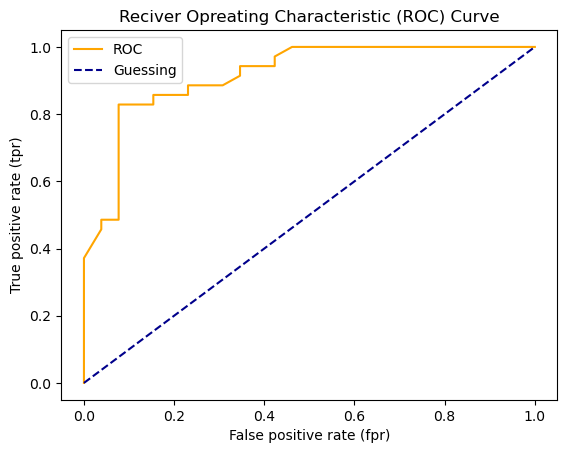

In [93]:
# import a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of the model.
    '''
    #Plot roc curve
    plt.plot(fpr,tpr,color = 'orange',label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")


    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Opreating Characteristic (ROC) Curve")
    plt.legend() # leging will take all the lables that is menshioned while ploting roc & baseline code
    plt.show()    

plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score

float(roc_auc_score(y_test,y_prob_positive))

0.915934065934066

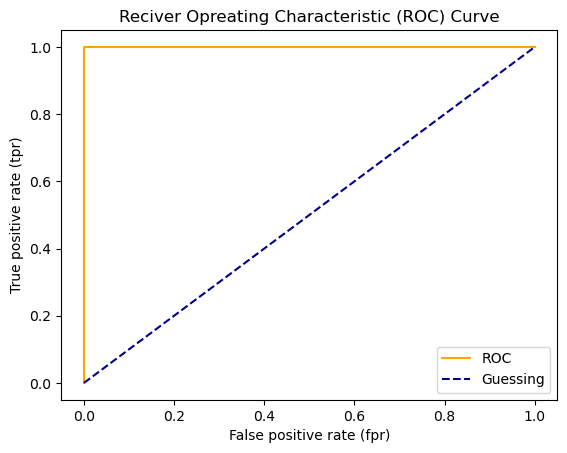

In [95]:
# Plot perfect ROC curve and AUC score
fpr,tpr,tresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [96]:
# Perfect AUC score
float(roc_auc_score(y_test,y_test))

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the lables a model predicts and the actual labels it was supposed to predict.


In essence , giveing you the idea where the model is geting confused

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[20,  6],
       [ 4, 31]], dtype=int64)

In [98]:
# Visuaization of confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted names"])

# Value of false positive & False negative should be low compared to True negative & True Positive which should be more

Predicted names,0,1
Actual labels,,
0,20,6
1,4,31


In [99]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

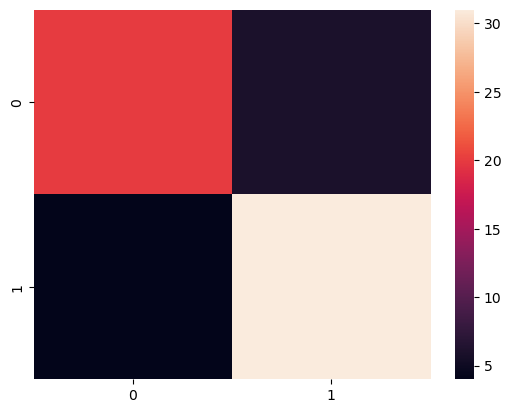

In [100]:
# Make our cnfusion's matrix more visual with seaborn's heatmap()
import seaborn as sns

#Set font scale
# sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#Plot using seaborn
sns.heatmap(conf_mat);

plt.show();

### Creating a confusion matrix using scikit-learn

to use the new metho of creating a confusion matrix you will need sklearn version 1.0+

In [101]:
import sklearn
sklearn.__version__

'1.5.2'

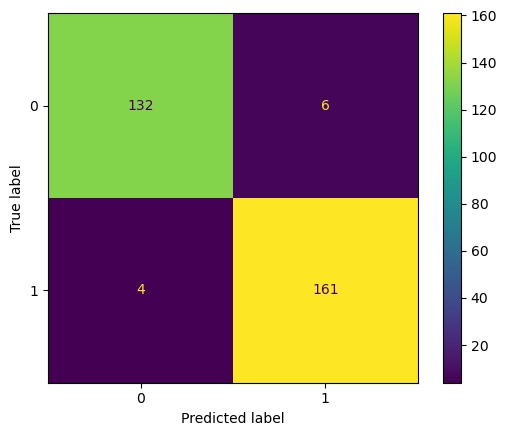

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)
plt.show()

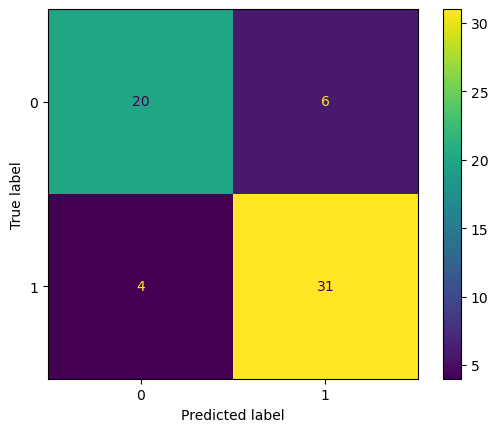

In [103]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)
plt.show()

In [104]:
what_we_are_covering

['0. An end-to-end Scikit-learn worklflow',
 '1. Getting the data ready',
 '2. Chose the right estimatoralgorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a traned model',
 '7. Putting it all together!']

## Classification report

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [106]:
# Where precetion snd recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) # model predicts every case as zero

#not understand
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


https://scikit-learn.org/1.5/modules/model_evaluation.html for more techineques

# Regression model evaluation matrix

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html 

The one's we're going to cover are:

1. R^2 (pronounced r-requared) of coefficent of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)


#### R^2 (pronounced r-requared) of coefficent of determination

In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [121]:
model.score(X_test,y_test)

0.806652667101436

In [122]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [123]:
y_test.mean()

2.0550030959302323

In [124]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean(),dtype=float)
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [133]:
r2_score(y_true=y_test,y_pred=y_preds)

# If you model is good then you should get score of 0 or negative it is considered goood 😊

0.806652667101436

In [126]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

#### Mean absolute error (MAE)

MAE is the average of the absolute diffrences between predictions and actual values

It gives you an idea of how wrong your model predictions are

In [127]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)

float(mae)


0.32656738464147306

In [128]:
df = pd.DataFrame(data = {"Actual values":y_test,
                          "Predicted values":y_preds})

df["Diffrences"] = df["Predicted values"]-df["Actual values"]
df

# Mae is average diffrence

,Actual values,Predicted values,Diffrences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.219830,-0.413170
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [129]:
float(np.abs(df["Diffrences"]).mean()) # What absalute does is make all -ve values positive the wefind the mean of the diffrences column

0.32656738464147306

#### Mean square error

In [130]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)


float(mean_squared_error(y_test,y_preds))

0.25336408094921037

In [131]:
df = pd.DataFrame({"Actual values":y_test,
                   "Predicted values":y_preds,
                   "Diffrence":(df["Actual values"]-df["Predicted values"])})
df

,Actual values,Predicted values,Diffrence
20046,0.47700,0.493900,-0.016900
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540240,-0.354240
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.219830,0.413170
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


In [132]:
float(np.square(df["Diffrence"]).mean())

0.25336408094921037

#### More the value worse the model is 😒 less the value good the model is 😊
Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being  `$10,000`   off is twice as bad as being   `$5,000` off.

Pay more attention to MSE: When being `$10,000` off is more than twice as bad as being `$5,000` off.

### 4.2.3 Finally using the `scoring` parameater

#### Higher the value better the model 😊

Link : https://scikit-learn.org/1.5/modules/model_evaluation.html

In [134]:
from sklearn.model_selection import cross_val_score

x = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

In [135]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring=None)# if scoring = None ,estimater's default scoring evaluation metrix is used (accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
# Cross-validation accuracy
print(f"The cross-validation accuracy is :{np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is :82.48%


In [139]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [140]:
print(f"The cross-validation accuracy is :{np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is :82.48%


In [141]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [142]:
print(f"The cross-validation precision is :{np.mean(cv_precision)}")

The cross-validation precision is :0.8329547346025924


In [143]:
# Recall
np.random.seed(42)

cv_recall = cross_val_score(clf,x,y,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [144]:
print(f"The cross-validation recall is :{np.mean(cv_recall)}")

The cross-validation recall is :0.8545454545454545


Let's see the `scorong` parameater used for regresstion problem...

In [148]:
from sklearn.ensemble import RandomForestRegressor

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

In [149]:
np.random.seed(42)

model.fit(x_train,y_train)

RandomForestRegressor()

In [165]:
# Cross validation  r2
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [166]:
print(f"The cross-validation default parameater score is :{np.mean(cv_r2)")

The cross-validation default parameater score is :65.22%


In [167]:
# r2
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring='r2')
cv_r2

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [168]:
print(f"The cross-validation default parameater score is :{np.mean(cv_r2)")

The cross-validation default parameater score is :65.22%


In [157]:
# Cross validation explained variance
np.random.seed(42)
cv_acc = cross_val_score(model,x,y,cv=5,scoring='explained_variance')
cv_var

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [158]:
print(f"The cross-validation  explained variance is :{np.mean(cv_acc)}")

The cross-validation accuracy is :69.54%


In [173]:
# Mean abselute error
np.random.seed(42)
cv_mae = cross_val_score(model,x,y,scoring='neg_mean_squared_error') #nagative becouse we get MAE as negative
cv_mae

array([-0.51899364, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [170]:
print(f"The cross-validation Mean abselute error is :{np.mean(cv_mae)}")

The cross-validation Mean abselute error is :-0.4300986573544397%


In [172]:
# Mean aquared error
np.random.seed(42)
cv_mse = cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
cv_mse

array([-0.54254038, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

In [174]:
print(f"The cross-validation Mean squared error is :{np.mean(cv_mae)}")

The cross-validation Mean squared error is :-0.4300986573544397


## 4.3 Using diffrent evaluation matrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn models/estimaters is to using `sklearn.metrics` module - https://scikit-learn.org/stable/modules/model_evaluation.html

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train);

# Evaluate model using evaluation funtions
y_preds = clf.predict(x_test)

print("Classifier metrics on the test set")
print(f"Accuaracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"F1:{f1_score(y_test,y_preds)}")


Classifier metrics on the test set
Accuaracy:78.69%
Precision:0.7948717948717948
Recall:0.8611111111111112
F1:0.8266666666666667


In [196]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x =housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train);

y_preds = model.predict(x_test)

# Evaluate model using evaluation funtions
print("Regration metrics on the test set")
print(f"R2_score:{r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regration metrics on the test set
R2_score:79.31%
MAE:0.33228767967538775
MSE:0.2696602463142186


In [197]:
what_we_are_covering

['0. An end-to-end Scikit-learn worklflow',
 '1. Getting the data ready',
 '2. Chose the right estimatoralgorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a traned model',
 '7. Putting it all together!']

### 5. IMPROVING A MODEL

First predictions = baseline prediction
Firt model = baseline model

From a data perspective:
* Could we collect more data ? (genraly, the more data, the better)
* Could we improve our data ?

From a model perspective:
* Is there a better model we could use ?
* Could we improve a current model ?

Hyperparameaters  V/s Parameaters

Parameaters = model finds pattern in data

Hyperparameaters = settings on a model you can adjest to (potentially) improve its ability to find patterns

Three ways to adjest hyperparameaters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier()

In [199]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Can learn above functions in link : https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<img src="hyper_p_hand.jpg">

<img src = "hyper_p_2.jpg">

### 5.1 Tuning hyperparameters by hand

Laet's make 3 sets,traning,validition and test

A) Classification

In [200]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjext:

* `max_dept`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [229]:
def evaluation_preads(y_true,y_preds):
    '''
    performs evaluations comparision on y_true lables v/s y_pred labels 
    on the classification.
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall  = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)

    metric_dict = {'accuracy':round(accuracy,2),
                   'precision':round(precision,2),
                   'recall':round(recall,2),
                    'f1':round(f1,2)}

    print(f"Accuracy :{accuracy*100:.2f}%")
    print(f"Precition :{precision:.2f}")
    print(f"recall :{recall:.2f}")
    print(f"f1:{f1:.2f}")

    return metric_dict

In [230]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffel the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
x = heart_disease_shuffled.drop("target" ,axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15 % of dat for validation
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

len(x_train),len(x_valid),len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Make baseline prediction
y_preds = clf.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluation_preads(y_valid,y_preds)
baseline_metrics

Accuracy :82.22%
Precition :0.81
recall :0.88
f1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [231]:
np.random.seed(42)

# Create a secand classifier with diffrent hyperparameaters

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)

# Make prediction
y_preds_2 = clf.predict(x_valid)

#Evaluate the 2nd classifier on validation set
clf_2_matrics = evaluation_preads(y_valid,y_preds_2)
clf_2_matrics


Accuracy :82.22%
Precition :0.81
recall :0.88
f1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameater tuning with RandomizedSearchCV

In [224]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators":[10,100,200,300,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        'min_samples_leaf':[1,2,4],
        'min_samples_split':[2,4,6]}

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# train_split = round(0.7*len(heart_disease_shuffled))
# valid_split = round(train_split + 0.15*len(heart_disease_shuffled))
# x_train,y_train = x[:train_split],y[:train_split]
# x_valid,y_valid =x[train_split:valid_split],y[train_split:valid_split]
# x_test,y_test = x[valid_split:],y[valid_split:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup Randomize searchCV()

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=50 , #number of models to try
                            cv=5,
                            verbose=2)
#Fit the RandomizeSearchCV version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30

C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\avk

In [232]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [233]:
# Make prediction with best hyperparameater
rs_y_preds = rs_clf.predict(x_test)

#Evaluate the predictions 
rs_matrics = evaluation_preads(y_test,rs_y_preds)


Accuracy :95.65%
Precition :0.96
recall :0.96
f1:0.96


### 5.3 Hyperameater tuning with GridSearchCV


In [234]:
grid

{'n_estimators': [10, 100, 200, 300, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6]}

In [236]:
# {'n_estimators': [10, 100, 200, 300, 500, 1000, 1200], # 6 values
#  'max_depth': [None, 5, 10, 20, 30], # 5 values
#  'max_features': ['auto', 'sqrt'], # 2 values
#  'min_samples_leaf': [1, 2, 4], # 3 values
#  'min_samples_split': [2, 4, 6]} # 3 values

In [239]:
6*5*4*2*3*5  #Total combination

3600

In [259]:
grid_2 = {'n_estimators': [10, 100,200,500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1,2,4],
     'min_samples_split': [6,8]}   # reduce our search space base on above best --prams--

In [260]:
3*1*2*2*1*5

60

In [261]:
from  sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid_2,
                            cv=5,
                            verbose=2)
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, 

C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\avk24\Conda\ztm_ML\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\avk24\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [6, 8],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=2)

In [264]:
gs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [265]:
gs_y_preads = gs_clf.predict(x_test)

gs_matrics = evaluation_preads(y_test,gs_y_preads)

Accuracy :44.26%
Precition :0.47
recall :0.59
f1:0.53


Let's compare our diffrent models matrics

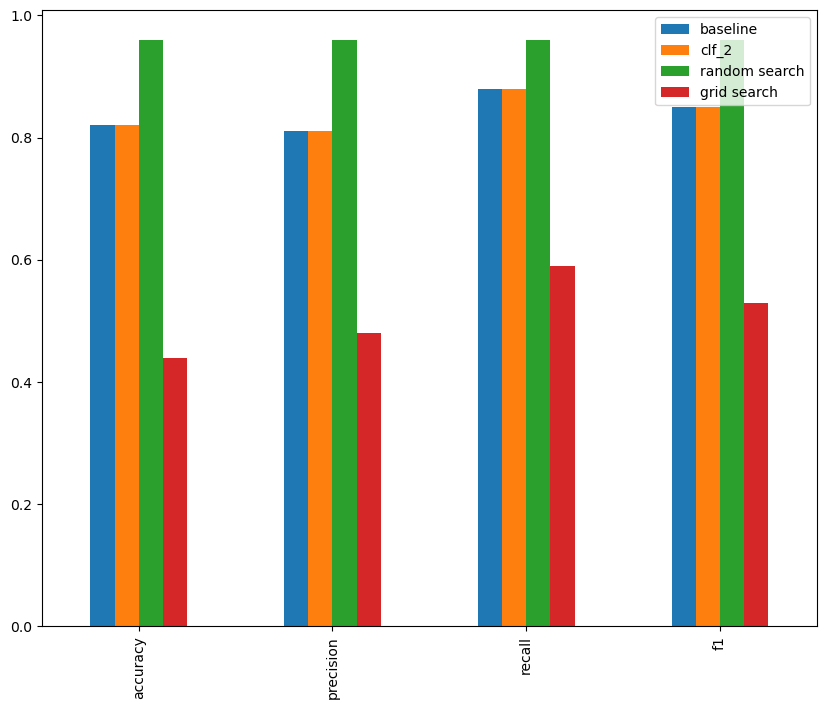

In [267]:
compare_matrics = pd.DataFrame({'baseline':baseline_metrics,
                                'clf_2':clf_2_matrics,
                                'random search':rs_matrics,
                                 'grid search':gs_matrics})

compare_matrics.plot.bar(figsize=(10,8))
plt.show();

In [268]:
what_we_are_covering

['0. An end-to-end Scikit-learn worklflow',
 '1. Getting the data ready',
 '2. Chose the right estimatoralgorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a traned model',
 '7. Putting it all together!']

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickel**

In [269]:
import pickle

#Save an extisisting model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [272]:
# Load a saved model
loaded_pickel_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [273]:
# Make some predictions
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
pickel_y_preads = loaded_pickel_model.predict(x_test)
evaluation_preads(y_test,pickel_y_preads)

Accuracy :86.89%
Precition :0.89
recall :0.89
f1:0.89


{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

## Joblib

In [276]:
from joblib import dump,load

#Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [277]:
# Import saved joblib model

loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [279]:
# Make and evaluate joblib predictions

joblib_ypreds = loaded_job_model.predict(x_test)
evaluation_preads(y_test,joblib_ypreds)

Accuracy :86.89%
Precition :0.89
recall :0.89
f1:0.89


{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

## 7. Putting it all together

In [281]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [282]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [283]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model to Data

In [299]:
#Geting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setupp random seed
import numpy as np
np.random.seed(42)

# Import data drop rows with missing labes
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define diffrent features and transfor pipeline
catagorical_features=["Make","Colour"]
catagorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                           ('onehot',OneHotEncoder(handle_unknown='ignore'))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value= 4))])

numeric_featues = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

#Setup the pre-processing fill missing value and convert into number

preprocessor = ColumnTransformer(transformers=[('cat',catagorical_transformer,catagorical_features),
                                               ('door',door_transformer,door_features),
                                               ('num',numeric_transformer,numeric_featues)])
                                   

#Creat a preprocssing and modelling pipeline
model = Pipeline(steps = [('preprocessor',preprocessor),
                           ('model',RandomForestRegressor())])

#Split data
x = data.drop("Price",axis=1)
y = data["Price"] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Fit and score the model
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())])

In [300]:
model.score(x_test,y_test)

0.22188417408787875

In [307]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {

    "preprocessor__num__imputer__strategy":['mean','median'],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["sqrt", "log2", None],
    "model__min_samples_split":[2,4]
}
gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)

gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [308]:
gs_model.score(x_test,y_test)

0.28660438125948107